# Global Shark Attacks Project
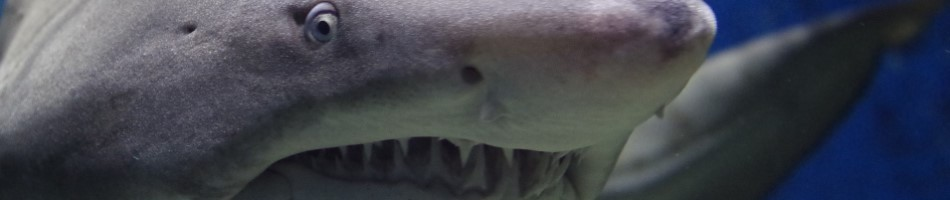

# Import from Libraries

In [1]:
import pandas as pd
import re
import numpy as np

# Import Data Set

In [2]:
tb_attack = pd.read_csv('archive/attacks.csv',
                    encoding = 'latin-1')

# Data first sight

In [3]:
tb_attack.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [4]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
tb_attack.head(500)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,6/25/2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,6/18/2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,6/9/2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,6/8/2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,6/4/2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
5,2018.06.03.b,6/3/2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,NaN,NaN
6,2018.06.03.a,6/3/2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0,NaN,NaN
7,2018.05.27,5/27/2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,NaN,NaN
8,2018.05.26.b,5/26/2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N,17h00,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0,NaN,NaN
9,2018.05.26.a,5/26/2018,2018.0,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Standing,male,M,12,Minor injury to foot,N,14h00,NaN,"K. McMurray, Tracking Sharks.com",2018.05.26.a-DaytonaBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.a,2018.05.26.a,6294.0,NaN,NaN


In [5]:
tb_attack.isna()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
25719,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
25720,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
25721,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [6]:
tb_attack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [7]:
tb_attack.describe()

,Year,original order
count,6300.000000,6309.000000
mean,1927.272381,3155.999683
std,281.116308,1821.396206
min,0.000000,2.000000
25%,1942.000000,1579.000000
50%,1977.000000,3156.000000
75%,2005.000000,4733.000000
max,2018.000000,6310.000000


In [8]:
#At first sight of the table content was possible to understand that are a lot of NaN values, and
#two of many questions that the data could answer are:
# 1) What species is most deadly?;
# 2) Where are the most deadly occurrences?
 
# So, the next step is to assess the columns: Year, Country, Injury, Fatal (Y/N) and Species, more closely.

# Data cleaning

In [9]:
'''Create a column with the sum of NaN values for each line'''
count_nan = [sum(tb_attack.loc[x, ['Year','Country','Injury','Fatal (Y/N)','Species ']].isna()) 
             for x in range(len(tb_attack.index))]
tb_attack['Count_nan'] = pd.Series(count_nan)

In [10]:
'''Check if it worked well'''
tb_attack.head(-5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,Count_nan
0,2018.06.25,6/25/2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN,0
1,2018.06.18,6/18/2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN,1
2,2018.06.09,6/9/2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN,1
3,2018.06.08,6/8/2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN,0
4,2018.06.04,6/4/2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
25714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
25715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
25716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


In [11]:
'''Create a list of the lines filled with NaN values in all columns'''
drop_lines = [line for line in range(len(tb_attack.index)) if tb_attack.loc[line,'Count_nan'] == 5]

In [12]:
'''Check how table contente would be if all lines filled just with NaN values were deleted'''
tb_attack.drop(drop_lines, axis = 0).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6301 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null   

In [13]:
'''Delete lines filled just with NaN values'''
tb_attack = tb_attack.drop(drop_lines, axis = 0)
tb_attack.head(-5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,Count_nan
0,2018.06.25,6/25/2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN,0
1,2018.06.18,6/18/2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN,1
2,2018.06.09,6/9/2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN,1
3,2018.06.08,6/8/2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN,0
4,2018.06.04,6/4/2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6292,ND.0010,Circa 1862,0.0,Unprovoked,USA,Hawaii,Puna,NaN,"A ""chiefess""",F,NaN,Ankle bitten,N,NaN,NaN,Captain W. Young,ND-0010-Puna Hawaii.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0010,ND.0010,11.0,NaN,NaN,1
6293,ND.0009,Before 1906,0.0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,boy,M,NaN,"FATAL, knocked overboard by tail of shark & ca...",Y,NaN,Blue pointer,"NY Sun, 9/9/1906, referring to account by Loui...",ND-0009-boy-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0009,ND.0009,10.0,NaN,NaN,0
6294,ND.0008,Before 1906,0.0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,fisherman,M,NaN,FATAL,Y,NaN,Blue pointer,"NY Sun, 9/9/1906, referring to account by Loui...",ND-0008-Fisherman2-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0008,ND.0008,9.0,NaN,NaN,0
6295,ND.0007,Before 1906,0.0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,fisherman,M,NaN,FATAL,Y,NaN,Blue pointers,"NY Sun, 9/9/1906, referring to account by Loui...",ND-0007 - Fisherman-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0007,ND.0007,8.0,NaN,NaN,0


### Assess Year column

In [14]:
tb_attack['Year'].value_counts().sort_values()

1815.0      1
5.0         1
77.0        1
500.0       1
1543.0      1
1554.0      1
1555.0      1
1580.0      1
1595.0      1
1637.0      1
1638.0      1
1703.0      1
1721.0      1
1617.0      1
1733.0      1
1738.0      1
1767.0      1
1764.0      1
1758.0      1
1742.0      1
1748.0      1
1723.0      1
1753.0      1
1751.0      1
1755.0      1
1749.0      1
1771.0      1
1791.0      1
1783.0      1
1807.0      1
1779.0      1
1784.0      1
1785.0      1
1786.0      1
1787.0      1
1788.0      1
1792.0      1
1797.0      1
1800.0      1
1801.0      1
1802.0      1
1780.0      1
1804.0      1
1810.0      1
1841.0      1
1857.0      1
1859.0      1
1834.0      1
1805.0      1
1822.0      1
1823.0      1
1818.0      1
1816.0      1
1812.0      1
1811.0      1
1819.0      1
1850.0      2
1642.0      2
1776.0      2
1869.0      2
1825.0      2
1866.0      2
1828.0      2
1832.0      2
1835.0      2
1836.0      2
1831.0      2
1803.0      2
1829.0      3
1808.0      3
1700.0      3
1851.0

In [15]:
'''Create masks to filter all date columns content to try to fill Year with information from other column'''
mask_Year_NaN = tb_attack['Year'].isna()
mask_Date_NaN = tb_attack['Date'].isna()
mask_Case_NaN = tb_attack['Case Number'].isna()

In [16]:
tb_attack[mask_Year_NaN & ~mask_Date_NaN & ~mask_Case_NaN]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,Count_nan
187,2017.01.08.R,Reported 08-Jan-2017,NaN,Invalid,AUSTRALIA,Queensland,NaN,Spearfishing,Kerry Daniel,M,35,"No attack, shark made a threat display",NaN,NaN,Bull shark,Liquid Vision 1/8/2017,2017.01.08.R-KerryDaniel.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.01.08.R,2017.01.08.R,6116.0,NaN,NaN,2
6079,1836.08.19.R,Reported 19-Aug-1836,NaN,Unprovoked,ENGLAND,Cumberland,Whitehaven,Swimming,a boy,M,NaN,FATAL,Y,NaN,NaN,"C. Moore, GSAF",1835.08.19.R-Whitehaven.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1836.08.19.R,1836.08.19.R,224.0,NaN,NaN,2


In [17]:
'''Fill NaN value with information of Date column'''
tb_attack.loc[187,'Year'] = 2017
tb_attack.loc[6079,'Year'] = 1836

In [18]:
'''Now, there is no NaN value in Year column'''
sum(tb_attack['Year'].isna())

0

In [19]:
'''Create masks to filter all date columns content to try to fill Year with information from other column'''
mask_Year_err = tb_attack['Year'] <= 500.0
tb_attack[mask_Year_err & ~mask_Date_NaN & ~mask_Case_NaN]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,Count_nan
6174,0500.00.00,Circa 500 A.D.,500.0,Unprovoked,MEXICO,NaN,NaN,NaN,male,M,NaN,Foot severed,N,NaN,NaN,J. Castro,500AD-Mexico.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0500.00.00,0500.00.00,129.0,NaN,NaN,1
6175,0077.00.00,77 A.D.,77.0,Unprovoked,NaN,Ionian Sea,NaN,Sponge diving,males,M,NaN,FATAL,Y,NaN,NaN,Perils mentioned by Pliny the Elder (23 A.D. t...,77AD-Pliny.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0077.00.00,0077.00.00,128.0,NaN,NaN,2
6176,0005.00.00,Ca. 5 A.D.,5.0,Unprovoked,AUSTRALIA,New South Wales,Bondi,NaN,male,M,NaN,Aboriginal rock carving depicts man being atta...,N,NaN,NaN,Waverly Library,0005.00.00-AustralianAboriginal.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0005.00.00,0005.00.00,127.0,NaN,NaN,1
6177,0.0214,Ca. 214 B.C.,0.0,Unprovoked,NaN,Ionian Sea,NaN,Ascending from a dive,"Tharsys, a sponge diver",M,NaN,"FATAL, shark/s bit him in two",Y,NaN,NaN,"Reported by Greek poet, Leonidas of Tarentum (...",214BC-Tharsys.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0.0214,0.0214,126.0,NaN,NaN,2
6178,0.0336,Ca. 336.B.C..,0.0,Unprovoked,GREECE,Piraeus,In the haven of Cantharus,Washing his pig in preparation for a religious...,A candidate for initiation,M,NaN,"FATAL, shark ""bit off all lower parts of him u...",Y,NaN,NaN,Plutarch (45 - 125 A.D.) in Life of Phoecion (...,336-BC-Carnathus.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0.0336,0.0336,125.0,NaN,NaN,1
6179,0.0493,493 B.C.,0.0,Sea Disaster,GREECE,Off Thessaly,NaN,Shipwrecked Persian Fleet,males,M,NaN,Herodotus tells of sharks attacking men in the...,Y,NaN,NaN,Herodotus (485 - 425 B.C.),493BC-PersianFleet.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0.0493,0.0493,124.0,NaN,NaN,1
6180,0.0725,Ca. 725 B.C.,0.0,Sea Disaster,ITALY,Tyrrhenian Sea,Krater found during excavations at Lacco Ameno...,Shipwreck,males,M,NaN,Depicts shipwrecked sailors attacked by a sha...,Y,NaN,NaN,"V.M. Coppleson (1958), p.262, et al",725BC-vase.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0.0725,0.0725,123.0,NaN,NaN,1
6181,ND-0154,Before 1939,0.0,Unprovoked,CANADA,NaN,Grand Banks,Fishing,Joe Folsom,M,NaN,Arm bitten,N,NaN,NaN,"C.E.Russell, pp. 310-311",ND-0154-Folsom.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND-0154,ND-0154,122.0,NaN,NaN,1
6182,ND-0153,1990 or 1991,0.0,Unprovoked,KENYA,Mombasa,Kilindini,Diving,Conway Plough & Dr. Jonathan Higgs,M,NaN,Conway's leg was bitten Higgs injury was FATAL,N,NaN,NaN,A.J. Venter,ND-0153-Plough-Higgs.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND-0153,ND-0153,121.0,NaN,NaN,1
6183,ND-0152,Before 2016,0.0,Unprovoked,KENYA,Mombasa,Kilindini,Diving,Hamisi Njenga,M,NaN,FATAL,Y,NaN,NaN,eadestination,ND-0152-Kenya.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND-0152,ND-0152,120.0,NaN,NaN,1


In [20]:
'''Clean Year columns from too old date'''
pattern = r'15[\d]{2}|16[\d]{2}|17[\d]{2}|18[\d]{2}|19[\d]{2}|20[\d]{2}'
tb_attack['Year_clean'] = tb_attack['Date'].map(lambda x: re.findall(pattern, x)).map(lambda x: x.pop(0) 
                                                                                      if len(x)>0 else np.nan)

In [21]:
'''Delete data before 1500'''
list_drop = [elemento for elemento in range(len(tb_attack.index)) if type(tb_attack.loc[elemento, 'Year_clean']) != str]
tb_attack = tb_attack.drop(list_drop).reset_index()
tb_attack_1500 = tb_attack

In [22]:
tb_attack['Year_clean'] = tb_attack['Year_clean'].map(int)
tb_attack_1500 = tb_attack

In [23]:
'''50% of the data is after 1977'''
tb_attack['Year_clean'].describe()

count    6283.000000
mean     1965.819672
std        47.675897
min      1543.000000
25%      1938.000000
50%      1977.000000
75%      2005.000000
max      2018.000000
Name: Year_clean, dtype: float64

In [24]:
'''Drop data before 1970'''
list_drop_b1970 = [elemento for elemento in range(len(tb_attack.index)) if tb_attack.loc[elemento, 'Year_clean'] < 1970]
tb_attack = tb_attack.drop(list_drop_b1970).reset_index()

### Assess Country column

In [25]:
'''Countries with more occurrences: USA, Australia, South Africa, Brazil'''
tb_attack['Country'].value_counts().sort_values()

IRAN                                        1
INDIA                                       1
LIBERIA                                     1
DIEGO GARCIA                                1
PORTUGAL                                    1
NORTH ATLANTIC OCEAN                        1
NAMIBIA                                     1
TUNISIA                                     1
PACIFIC OCEAN                               1
NEVIS                                       1
ANGOLA                                      1
PALAU                                       1
BRITISH ISLES                               1
EGYPT / ISRAEL                              1
LIBYA                                       1
MALDIVES                                    1
KOREA                                       1
NORTHERN ARABIAN SEA                        1
BANGLADESH                                  1
SOUTH CHINA SEA                             1
PALESTINIAN TERRITORIES                     1
WESTERN SAMOA                     

### Assess Fatal (Y/N) column

In [26]:
'''Create table with content of interest'''
tb_fatal = tb_attack.loc[:,['Year_clean','Country','Fatal (Y/N)','Injury','Species ']]

In [27]:
'''See content that needs cleaning'''
tb_fatal['Fatal (Y/N)'].unique()

array(['N', 'Y', nan, 'M', 'UNKNOWN', '2017'], dtype=object)

In [28]:
'''That is no need to clean content of "Fatal (Y/N)", becouse the only two data that could be recoverd become from countries that are not object of this study'''
mask_fatal = [line for line in range(len(tb_fatal)) if tb_fatal.loc[line,'Fatal (Y/N)'] == 'M' or 
              tb_fatal.loc[line,'Fatal (Y/N)'] == 'UNKNOWN' or tb_fatal.loc[line,'Fatal (Y/N)'] == '2017']
tb_fatal.loc[mask_fatal]

,Year_clean,Country,Fatal (Y/N),Injury,Species
285,2016,FRENCH POLYNESIA,M,Laceration to knee by speared shark PROVOKED I...,"Grey reef shark, 2 m"
622,2013,USA,UNKNOWN,No details,NaN
784,2012,ITALY,2017,Lower left leg injured PROVOKED ACCIDENT,"Blue shark, 2.5m"
1268,2008,AUSTRALIA,UNKNOWN,NaN,"Tiger shark, 2.3m"
2241,1997,BRAZIL,UNKNOWN,NaN,NaN
2251,1997,USA,UNKNOWN,No details,NaN
2258,1996,AUSTRALIA,UNKNOWN,NaN,NaN
2286,1996,USA,UNKNOWN,No details,NaN
2298,1996,USA,UNKNOWN,No details,NaN
2314,1996,AUSTRALIA,UNKNOWN,No details,NaN


In [29]:
'''Filter data by country'''
mask_country = [line for line in range(len(tb_fatal.index)) if tb_fatal.loc[line,'Country'] == 'USA' or 
                tb_fatal.loc[line,'Country'] == 'AUSTRALIA' or tb_fatal.loc[line,'Country'] == 'BRAZIL' or 
                tb_fatal.loc[line,'Country'] == 'SOUTH AFRICA']
tb_fatal = tb_fatal.loc[mask_country].reset_index()

In [30]:
tb_fatal['Fatal (Y/N)'] = tb_fatal['Fatal (Y/N)'].fillna('UNKNOWN')

In [31]:
tb_fatal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2615 entries, 0 to 2614
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        2615 non-null   int64 
 1   Year_clean   2615 non-null   int64 
 2   Country      2615 non-null   object
 3   Fatal (Y/N)  2615 non-null   object
 4   Injury       2609 non-null   object
 5   Species      1744 non-null   object
dtypes: int64(2), object(4)
memory usage: 122.7+ KB


# Output Data Analysis

### Country x Fatal cases

In [32]:
'''Add columns whith True and False values for Fatal, None Fatal and Unknown cases'''
tb_c_f = tb_fatal.drop('index', axis = 1).reset_index()
tb_c_f['Fatal (Y)'] = [True if i == 'Y' else False for i in tb_c_f['Fatal (Y/N)']]
tb_c_f['Fatal (N)'] = [True if i == 'N' else False for i in tb_c_f['Fatal (Y/N)']]
tb_c_f['Fatal (UNKNOWN)'] = [True if i == 'UNKNOWN' else False for i in tb_c_f['Fatal (Y/N)']]

In [33]:
'''Add columns of relative percentage for Fatal, None Fatal and Unknown cases for each country'''
tb_ftl_country = tb_c_f.groupby(by = 'Country')['Fatal (Y/N)','Fatal (Y)','Fatal (N)','Fatal (UNKNOWN)','Species '].sum()
tb_ftl_country['Total'] = [sum(tb_ftl_country.loc[i,'Fatal (Y)':'Fatal (UNKNOWN)']) for i in tb_ftl_country.index]
tb_ftl_country['Rel Fatal (Y)%'] = [(tb_ftl_country.loc[i,'Fatal (Y)']/tb_ftl_country.loc[i,'Total'])*100 for i in 
                                    tb_ftl_country.index]
tb_ftl_country['Rel Fatal (N)%'] = [(tb_ftl_country.loc[i,'Fatal (N)']/tb_ftl_country.loc[i,'Total'])*100 for i in 
                                    tb_ftl_country.index]
tb_ftl_country['Rel Fatal (UNKNOWN)%'] = [(tb_ftl_country.loc[i,'Fatal (UNKNOWN)']/tb_ftl_country.loc[i,'Total'])*100 
                                          for i in tb_ftl_country.index]
tb_ftl_country.drop(['Fatal (Y)','Fatal (N)','Fatal (UNKNOWN)'],axis=1)

C:\Users\yasmi\AppData\Local\Temp/ipykernel_8104/3581450525.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tb_ftl_country = tb_c_f.groupby(by = 'Country')['Fatal (Y/N)','Fatal (Y)','Fatal (N)','Fatal (UNKNOWN)','Species '].sum()


,Total,Rel Fatal (Y)%,Rel Fatal (N)%,Rel Fatal (UNKNOWN)%
Country,,,,
AUSTRALIA,566,11.484099,78.798587,9.717314
BRAZIL,103,30.097087,61.165049,8.737864
SOUTH AFRICA,358,11.173184,78.212291,10.614525
USA,1588,3.211587,89.861461,6.926952


#### The next code produce a table with data since 1500 from the four countries of interest.
#### The objective is to see the evolution of collection of data throughout time.
#### It is possible to see that the tendency line of fatal and none/unknown fatal cases increases in distance throughout time.
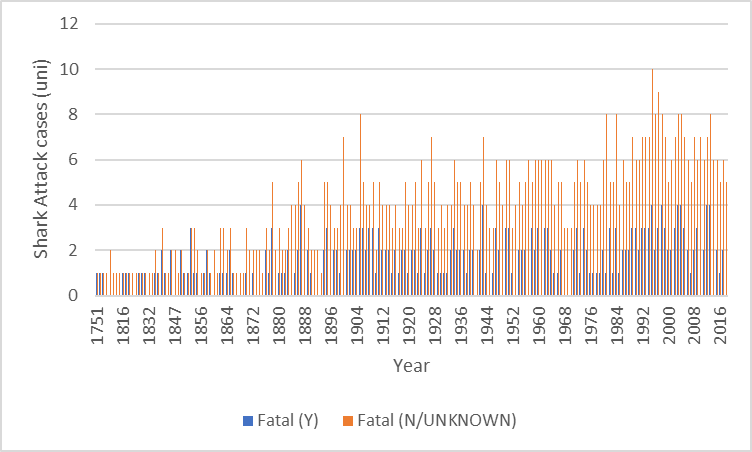

In [50]:
tb_ftl_year = pd.DataFrame(tb_attack_1500.groupby(by = ['Country','Year_clean'])['Fatal (Y/N)'].value_counts())
tb_ftl_year = tb_ftl_year.rename({'Fatal (Y/N)':'Fatal_count'}, axis = 1).reset_index()
tb_ftl_year['Fatal (Y)'] = [True if i == 'Y' else False for i in tb_ftl_year['Fatal (Y/N)']]
tb_ftl_year['Fatal (N)'] = [True if i == 'N' else False for i in tb_ftl_year['Fatal (Y/N)']]
tb_ftl_year['Fatal (UNKNOWN)'] = [True if i == 'UNKNOWN' else False for i in tb_ftl_year['Fatal (Y/N)']]
tb_ftl_year = tb_ftl_year.drop('Fatal (Y/N)', axis = 1)
tb_ftl_year = tb_ftl_year.groupby(by = ['Country','Year_clean'])['Fatal (Y)','Fatal (N)','Fatal (UNKNOWN)'].sum().reset_index()
mask_country = [line for line in range(len(tb_ftl_year.index)) if tb_ftl_year.loc[line,'Country'] == 'USA' or 
                tb_ftl_year.loc[line,'Country'] == 'AUSTRALIA' or tb_ftl_year.loc[line,'Country'] == 'BRAZIL' or 
                tb_ftl_year.loc[line,'Country'] == 'SOUTH AFRICA']
tb_ftl_year = tb_ftl_year.loc[mask_country].reset_index()
tb_ftl_year = tb_ftl_year.groupby(by = 'Year_clean')['Fatal (Y)','Fatal (N)','Fatal (UNKNOWN)'].sum()
tb_ftl_year

C:\Users\yasmi\AppData\Local\Temp/ipykernel_8104/366354195.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tb_ftl_year = tb_ftl_year.groupby(by = ['Country','Year_clean'])['Fatal (Y)','Fatal (N)','Fatal (UNKNOWN)'].sum().reset_index()
C:\Users\yasmi\AppData\Local\Temp/ipykernel_8104/366354195.py:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tb_ftl_year = tb_ftl_year.groupby(by = 'Year_clean')['Fatal (Y)','Fatal (N)','Fatal (UNKNOWN)'].sum()


,Fatal (Y),Fatal (N),Fatal (UNKNOWN)
Year_clean,,,
1751,1,0,0
1771,1,0,0
1780,1,0,0
1788,0,1,0
1803,0,2,0
1804,0,1,0
1807,0,1,0
1810,1,0,0
1816,1,0,0


### Assess Species
#### The most aggressive species are: bull shark, white shark and tiger shark. The following code will focus in cleanning these species occurences.
#### White shark - Carcharodon carcharias
#### Bull shark - Carcharhinus leucas
#### Tiger shark - Galeocerdo cuvier

In [35]:
'''Fill NaN values with "UNKNOWN"'''
tb_fatal['Species '] = tb_fatal['Species '].fillna('UNKNOWN')

In [36]:
'''Lower letters'''
tb_fatal['Species '] = tb_fatal['Species '].map(str)
tb_fatal['Species '] = [tb_fatal.loc[i, 'Species '].lower() for i in tb_fatal.index]

In [37]:
'''Create a column of "Species_clean" with only the most aggessive species in it. Use REGEX pattern'''
pattern_species = r'white|carcharias|bull|leucas|tiger|cuvier'
tb_fatal['Species_clean'] = tb_fatal['Species '].map(lambda x: re.findall(pattern_species,x)).map(lambda x: x.pop(0) 
                                                                                          if len(x)>0 else np.nan)
tb_fatal

,index,Year_clean,Country,Fatal (Y/N),Injury,Species,Species_clean
0,0,2018,USA,N,"No injury to occupant, outrigger canoe and pad...",white shark,white
1,1,2018,USA,N,Minor injury to left thigh,unknown,NaN
2,2,2018,USA,N,Injury to left lower leg from surfboard skeg,unknown,NaN
3,3,2018,AUSTRALIA,N,Minor injury to lower leg,2 m shark,NaN
4,5,2018,AUSTRALIA,N,"No injury, board bitten",unknown,NaN
...,...,...,...,...,...,...,...
2610,3369,2012,USA,N,Minor laceration to hand,"galapagos shark, 6'",NaN
2611,3373,2009,USA,N,Severe abrasion to forearm from captive shark ...,"blacktip shark, 5'",NaN
2612,3374,1994,USA,N,Legs bitten,unknown,NaN
2613,3376,2006,USA,N,"No injury, shark rammed his back",unknown,NaN


In [38]:
tb_fatal['Species_clean'].value_counts()

white     418
tiger     147
bull      101
leucas      1
Name: Species_clean, dtype: int64

In [39]:
'''Check if REGEX pattern worked well'''
tb_fatal.dropna().head(500)

,index,Year_clean,Country,Fatal (Y/N),Injury,Species,Species_clean
0,0,2018,USA,N,"No injury to occupant, outrigger canoe and pad...",white shark,white
5,6,2018,BRAZIL,Y,FATAL,tiger shark,tiger
7,8,2018,USA,N,Lower left leg bitten,"bull shark, 6'",bull
18,22,2018,AUSTRALIA,N,"No injury, shark struck his leg","white shark, 3.5 m",white
19,24,2018,SOUTH AFRICA,N,"No injury, shark bit hole in ski","white shark, 2.5 m",white
25,34,2018,SOUTH AFRICA,N,Lacerations to left knee & lower leg,white shark,white
26,35,2018,USA,N,Injuries to right leg & hand,"tiger shark, 12'",tiger
31,40,2018,AUSTRALIA,N,Laceratons to right leg & foot,"juvenile white shark, 2.7 to 3.2 m",white
33,42,2018,AUSTRALIA,N,Puncture wounds to leff foot & lower leg,"bull shark, 2 m",bull
37,47,2018,AUSTRALIA,N,Injuries to right leg,bull shark,bull


In [40]:
'''Save table content'''
tb_ftl_species = tb_fatal.dropna().drop(['Year_clean','Injury'],axis=1)

In [41]:
tb_ftl_species['White shark'] = [True if tb_ftl_species.loc[i, 'Species_clean'] == 'white' else False 
                                 for i in tb_ftl_species.index]
tb_ftl_species['Bull shark'] = [True if tb_ftl_species.loc[i, 'Species_clean'] == 'bull' or 'leucas' else False 
                                for i in tb_ftl_species.index]
tb_ftl_species['Tiger shark'] = [True if tb_ftl_species.loc[i, 'Species_clean'] == r'tiger' else False 
                                for i in tb_ftl_species.index]
tb_ftl_species['Country'].value_counts()

USA             337
AUSTRALIA       166
SOUTH AFRICA    144
BRAZIL           18
Name: Country, dtype: int64

In [42]:
tb_ftl_species = tb_ftl_species.groupby(by = ['Country','Fatal (Y/N)'])['White shark','Bull shark',
                                                                        'Tiger shark'].sum().reset_index()
tb_ftl_species

C:\Users\yasmi\AppData\Local\Temp/ipykernel_8104/4075960490.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tb_ftl_species = tb_ftl_species.groupby(by = ['Country','Fatal (Y/N)'])['White shark','Bull shark',


,Country,Fatal (Y/N),White shark,Bull shark,Tiger shark
0,AUSTRALIA,N,84,117,16
1,AUSTRALIA,UNKNOWN,1,3,1
2,AUSTRALIA,Y,34,46,7
3,BRAZIL,N,2,14,6
4,BRAZIL,Y,1,4,1
5,SOUTH AFRICA,N,107,113,4
6,SOUTH AFRICA,UNKNOWN,0,1,1
7,SOUTH AFRICA,Y,23,30,6
8,USA,N,153,310,94
9,USA,UNKNOWN,1,1,0


In [43]:
'''Create column for total cases (fatal,no fatal and unknown) per country'''
tb_ftl_species['Total USA'] = [336 if tb_ftl_species.loc[i,'Country'] == 'USA' else 0 for i in tb_ftl_species.index]
tb_ftl_species['Total AUS'] = [165 if tb_ftl_species.loc[i,'Country'] == 'AUSTRALIA' else 0 for i in tb_ftl_species.index]
tb_ftl_species['Total SA'] = [143 if tb_ftl_species.loc[i,'Country'] == 'SOUTH AFRICA' else 0 for i in tb_ftl_species.index]
tb_ftl_species['Total BR'] = [18 if tb_ftl_species.loc[i,'Country'] == 'BRAZIL' else 0 for i in tb_ftl_species.index]
tb_ftl_species['Total attacks'] = [sum(tb_ftl_species.loc[i,'Total USA':'Total BR']) for i in tb_ftl_species.index]
tb_ftl_species

,Country,Fatal (Y/N),White shark,Bull shark,Tiger shark,Total USA,Total AUS,Total SA,Total BR,Total attacks
0,AUSTRALIA,N,84,117,16,0,165,0,0,165
1,AUSTRALIA,UNKNOWN,1,3,1,0,165,0,0,165
2,AUSTRALIA,Y,34,46,7,0,165,0,0,165
3,BRAZIL,N,2,14,6,0,0,0,18,18
4,BRAZIL,Y,1,4,1,0,0,0,18,18
5,SOUTH AFRICA,N,107,113,4,0,0,143,0,143
6,SOUTH AFRICA,UNKNOWN,0,1,1,0,0,143,0,143
7,SOUTH AFRICA,Y,23,30,6,0,0,143,0,143
8,USA,N,153,310,94,336,0,0,0,336
9,USA,UNKNOWN,1,1,0,336,0,0,0,336


In [44]:
drop_list = [i for i in tb_ftl_species.index if tb_ftl_species.loc[i,'Fatal (Y/N)'] == 'N' or 
             tb_ftl_species.loc[i,'Fatal (Y/N)'] == 'UNKNOWN']
tb_ftl_species = tb_ftl_species.drop(drop_list)

In [45]:
tb_ftl_species = tb_ftl_species.drop(['Total USA','Total AUS','Total SA','Total BR'],axis=1)
tb_ftl_species

,Country,Fatal (Y/N),White shark,Bull shark,Tiger shark,Total attacks
2,AUSTRALIA,Y,34,46,7,165
4,BRAZIL,Y,1,4,1,18
7,SOUTH AFRICA,Y,23,30,6,143
10,USA,Y,11,26,10,336


In [46]:
tb_ftl_species['Fatal White shark attack %'] = [(tb_ftl_species.loc[i,'White shark']/tb_ftl_species.loc
                                                          [i,'Total attacks'])*100 for i in tb_ftl_species.index]
tb_ftl_species['Fatal Bull shark attack %'] = [(tb_ftl_species.loc[i,'Bull shark']/tb_ftl_species.loc
                                                          [i,'Total attacks'])*100 for i in tb_ftl_species.index]
tb_ftl_species['Fatal Tiger shark attack %'] = [(tb_ftl_species.loc[i,'Tiger shark']/tb_ftl_species.loc
                                                          [i,'Total attacks'])*100 for i in tb_ftl_species.index]
tb_ftl_species

,Country,Fatal (Y/N),White shark,Bull shark,Tiger shark,Total attacks,Fatal White shark attack %,Fatal Bull shark attack %,Fatal Tiger shark attack %
2,AUSTRALIA,Y,34,46,7,165,20.606061,27.878788,4.242424
4,BRAZIL,Y,1,4,1,18,5.555556,22.222222,5.555556
7,SOUTH AFRICA,Y,23,30,6,143,16.083916,20.979021,4.195804
10,USA,Y,11,26,10,336,3.273810,7.738095,2.976190


In [47]:
tb_ftl_species = tb_ftl_species.rename({'White shark':'Total fatal White shark attack'},axis=1
                     ).rename({'Bull shark':'Total fatal Bull shark attack'},axis=1
                             ).rename({'Tiger shark':'Total fatal Tiger shark attack'},axis=1).drop('Fatal (Y/N)', axis=1)

In [48]:
tb_ftl_species

,Country,Total fatal White shark attack,Total fatal Bull shark attack,Total fatal Tiger shark attack,Total attacks,Fatal White shark attack %,Fatal Bull shark attack %,Fatal Tiger shark attack %
2,AUSTRALIA,34,46,7,165,20.606061,27.878788,4.242424
4,BRAZIL,1,4,1,18,5.555556,22.222222,5.555556
7,SOUTH AFRICA,23,30,6,143,16.083916,20.979021,4.195804
10,USA,11,26,10,336,3.273810,7.738095,2.976190


In [49]:
tb_ftl_species_perc = tb_ftl_species.drop(['Total fatal White shark attack',
                                           'Total fatal Bull shark attack','Total fatal Tiger shark attack'], axis=1).reset_index().drop('index',axis=1)
tb_ftl_species_perc

,Country,Total attacks,Fatal White shark attack %,Fatal Bull shark attack %,Fatal Tiger shark attack %
0,AUSTRALIA,165,20.606061,27.878788,4.242424
1,BRAZIL,18,5.555556,22.222222,5.555556
2,SOUTH AFRICA,143,16.083916,20.979021,4.195804
3,USA,336,3.273810,7.738095,2.976190
